In [2]:
#Dependancies

import pandas as pd
import hvplot.pandas
import re
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from plotly.subplots import make_subplots
import os
import imageio

# Basic setup code.

In [4]:
# Reading csv into a DF
airfare = pd.read_csv("Consumer_Airfare_Report__Table_1a_-_All_U.S._Airport_Pair_Markets_20240712.csv", low_memory=False)

In [5]:
# Checking DF structure and details

airfare




,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE


In [6]:
airfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [7]:
# Testing creation of hashmap for latitude and longitude extraction and replacement



# lat_long_map = airfare.loc[airfare["Geocoded_City1"].isna() == False][['airportid_1','Geocoded_City1']]
# lat_long_map.drop_duplicates(inplace=True)
# lat_long_map.set_index("airportid_1", inplace=True)
# lat_long_map
# # ["Geocoded_City1
# # airfare["Geocoded_City1"].isna().sum()

In [8]:
columns = airfare.columns
columns

Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'tbl1apk'],
      dtype='object')

In [9]:
airfare[airfare["city1"]=="New York City, NY (Metropolitan Area)"]["airport_1"].value_counts()

airport_1
LGA    3951
JFK    3886
EWR    3877
ISP    3734
HPN    3729
SWF    3424
NYC     540
TSS      30
JRB       4
Name: count, dtype: int64

In [10]:
airfare_2k1_4_count = airfare.groupby(["Year","quarter"]).count().loc[[2001,2002,2003,2004]]

# .loc[[2001, 2004]].reset_index()
# airfare_2001.hvplot.line(y="tbl")

In [11]:
airfare_2k1_4_count

tbl  citymarketid_1  citymarketid_2  city1  city2  airportid_1  \
Year quarter                                                                    
2001 1        2164            2164            2164   2164   2164         2164   
     2        2217            2217            2217   2217   2217         2217   
     3        2181            2181            2181   2181   2181         2181   
     4        2086            2086            2086   2086   2086         2086   
2002 1        2127            2127            2127   2127   2127         2127   
     2        2164            2164            2164   2164   2164         2164   
     3        2175            2175            2175   2175   2175         2175   
     4        2123            2123            2123   2123   2123         2123   
2003 1        2072            2072            2072   2072   2072         2072   
     2        2138            2138            2138   2138   2138         2138   
     3        2148            2148            2148   2148   2148         2148   
     4        2130            2130            2130   2130   2130         2130   
2004 1        2083            2083            2083   2083   2083         2083   
     2        2172            2172            2172   2172   2172         2172   
     3        2157            2157            2157   2157   2157         2157   
     4        2054            2054            2054   2054   2054         2054   

              airportid_2  airport_1  airport_2  nsmiles  ...  fare  \
Year quarter                                              ...         
2001 1               2164       2164       2164     2164  ...  2164   
     2               2217       2217       2217     2217  ...  2217   
     3               2181       2181       2181     2181  ...  2181   
     4               2086       2086       2086     2086  ...  2086   
2002 1               2127       2127       2127     2127  ...  2127   
     2               2164       2164       2164     2164  ...  2164   
     3               2175       2175       2175     2175  ...  2175   
     4               2123       2123       2123     2123  ...  2123   
2003 1               2072       2072       2072     2072  ...  2072   
     2               2138       2138       2138     2138  ...  2138   
     3               2148       2148       2148     2148  ...  2148   
     4               2130       2130       2130     2130  ...  2130   
2004 1               2083       2083       2083     2083  ...  2083   
     2               2172       2172       2172     2172  ...  2172   
     3               2157       2157       2157     2157  ...  2157   
     4               2054       2054       2054     2054  ...  2054   

              carrier_lg  large_ms  fare_lg  carrier_low  lf_ms  fare_low  \
Year quarter                                                                
2001 1              2149      2149     2149         2149   2149      2149   
     2              2199      2199     2199         2199   2199      2199   
     3              2171      2171     2171         2171   2171      2171   
     4              2077      2077     2077         2077   2077      2077   
2002 1              2117      2117     2117         2117   2117      2117   
     2              2155      2155     2155         2155   2155      2155   
     3              2162      2162     2162         2162   2162      2162   
     4              2114      2114     2114         2114   2114      2114   
2003 1              2063      2063     2063         2063   2063      2063   
     2              2125      2125     2125         2125   2125      2125   
     3              2140      2140     2140         2140   2140      2140   
     4              2121      2121     2121         2121   2121      2121   
2004 1              2072      2072     2072         2072   2072      2072   
     2              2162      2162     2162         2162   2162      2162   
     3              2147      2147     2147  

<Axes: xlabel='Year,quarter'>

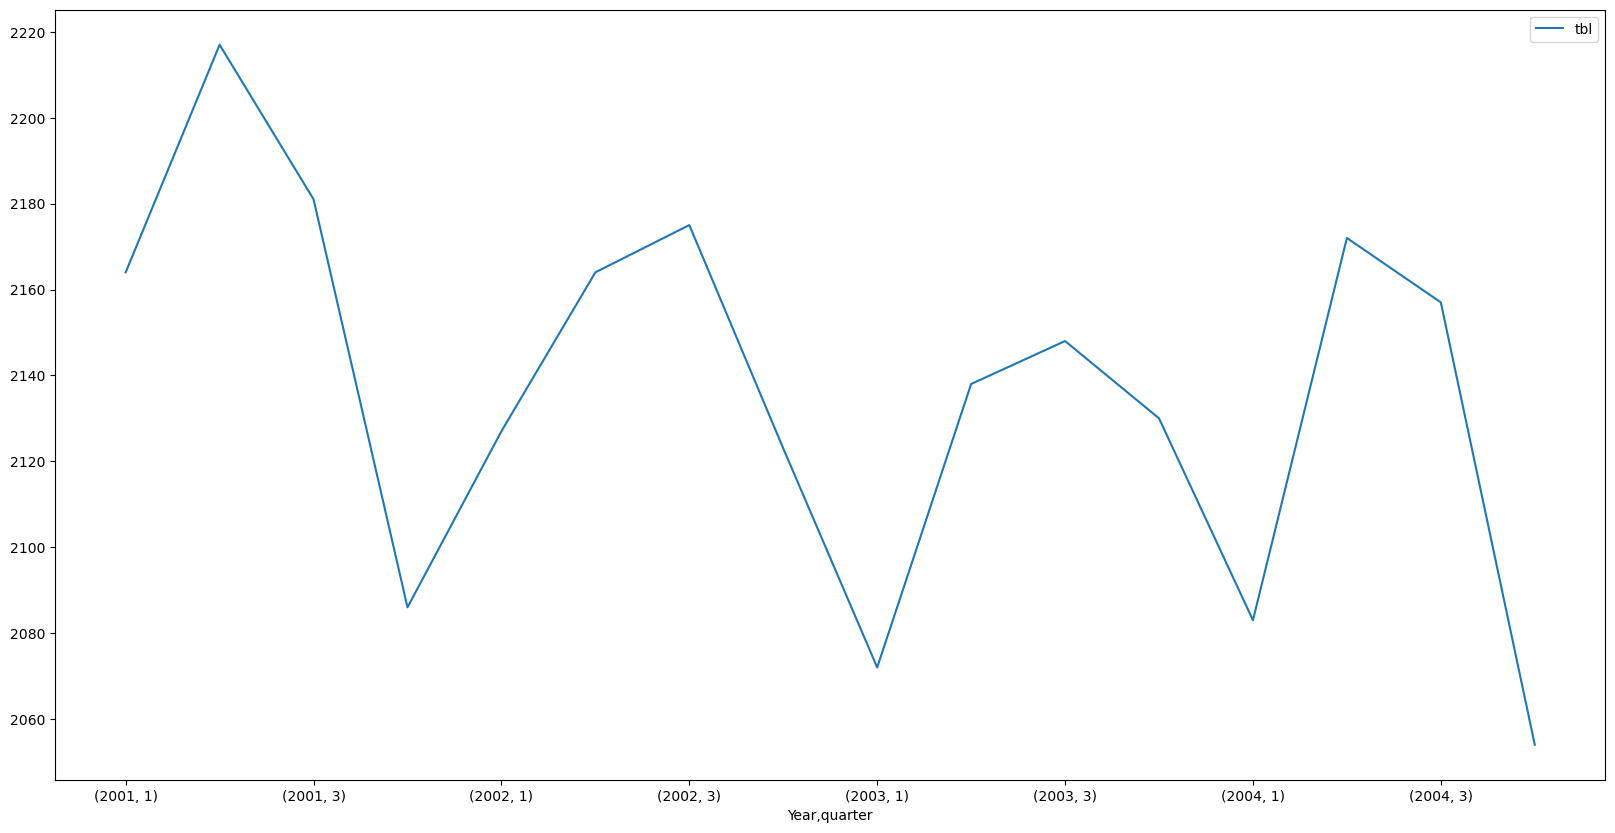

In [12]:
airfare_2k1_4_count.plot(y="tbl", figsize=(20,10))

# GEOMAPPING

### LAT-LONG DF

In [16]:
# Creating lat_long_map as a DF considering it as a hashmap for airport ID with respect to latitudes and longitudes.


lat_long_map = airfare.loc[airfare["Geocoded_City1"].isna() == False][['airportid_1','Geocoded_City1']]
lat_long_map.drop_duplicates(inplace=True)
lat_long_map.set_index("airportid_1", inplace=True)

In [17]:
# Same City, different airport IDs but same latitude and longitude

display(lat_long_map.loc[11298])
display(lat_long_map.loc[11259])

,Geocoded_City1
airportid_1,
11298,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
11298,"(40.11086, -77.035636)"


,Geocoded_City1
airportid_1,
11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
11259,"(40.11086, -77.035636)"


In [18]:
# Testing lat long extraction example.
lat_long_map.loc[15370]

,Geocoded_City1
airportid_1,
15370,"Tulsa, OK\n(61.096484, -160.967455)"
15370,"(61.096484, -160.967455)"


In [19]:
# Extract coordinates function using regular expression pattern matching.

def extract_coord(row):

    pattern = r'(?:(?:[A-Za-z\s]+,\s*[A-Z]{2})?\n?)?\(([-+]?\d*\.\d+),\s*([-+]?\d*\.\d+)\)'

    match = re.search(pattern,row)
    
    if match:
        # city = match.group(1)
        lat = float(match.group(1))
        lon = float(match.group(2))
        return lat, lon
    else:
        return None, None



In [20]:
len(lat_long_map)

317

In [21]:
# Extracting Latitude longitudes based on Geocoded_City1 into the hash map.

lat_long_map[["lat","long"]] = lat_long_map["Geocoded_City1"].apply(lambda x: pd.Series(extract_coord(x)))
lat_long_map

,Geocoded_City1,lat,long
airportid_1,,,
14869,"Salt Lake City, UT\n(40.758478, -111.888142)",40.758478,-111.888142
11109,"Colorado Springs, CO\n(38.835224, -104.819798)",38.835224,-104.819798
14122,"Pittsburgh, PA\n(40.442169, -79.994945)",40.442169,-79.994945
12889,"Las Vegas, NV\n(36.169202, -115.140597)",36.169202,-115.140597
12217,"Huntsville, AL\n(34.729538, -86.585283)",34.729538,-86.585283
...,...,...,...
14112,"(37.8606, -78.804199)",37.860600,-78.804199
14252,"(37.123874, -76.391902)",37.123874,-76.391902
14696,"(41.675032, -86.251962)",41.675032,-86.251962


In [22]:
# Reseting index before we drop duplicated airport ids.

lat_long_map.reset_index(inplace=True)

In [23]:
#view

lat_long_map

,airportid_1,Geocoded_City1,lat,long
0,14869,"Salt Lake City, UT\n(40.758478, -111.888142)",40.758478,-111.888142
1,11109,"Colorado Springs, CO\n(38.835224, -104.819798)",38.835224,-104.819798
2,14122,"Pittsburgh, PA\n(40.442169, -79.994945)",40.442169,-79.994945
3,12889,"Las Vegas, NV\n(36.169202, -115.140597)",36.169202,-115.140597
4,12217,"Huntsville, AL\n(34.729538, -86.585283)",34.729538,-86.585283
...,...,...,...,...
312,14112,"(37.8606, -78.804199)",37.860600,-78.804199
313,14252,"(37.123874, -76.391902)",37.123874,-76.391902
314,14696,"(41.675032, -86.251962)",41.675032,-86.251962
315,14783,"(39.79936, -89.643624)",39.799360,-89.643624


In [24]:
# Dropping duplicates based on airport ids.

lat_long_map.drop_duplicates(subset=['airportid_1'], inplace=True)
lat_long_map

,airportid_1,Geocoded_City1,lat,long
0,14869,"Salt Lake City, UT\n(40.758478, -111.888142)",40.758478,-111.888142
1,11109,"Colorado Springs, CO\n(38.835224, -104.819798)",38.835224,-104.819798
2,14122,"Pittsburgh, PA\n(40.442169, -79.994945)",40.442169,-79.994945
3,12889,"Las Vegas, NV\n(36.169202, -115.140597)",36.169202,-115.140597
4,12217,"Huntsville, AL\n(34.729538, -86.585283)",34.729538,-86.585283
...,...,...,...,...
304,10408,"(44.261982, -88.40724)",44.261982,-88.407240
305,10676,"(38.512629, -89.984229)",38.512629,-89.984229
308,12280,"(43.490842, -112.039087)",43.490842,-112.039087
313,14252,"(37.123874, -76.391902)",37.123874,-76.391902


In [25]:
# Setting back airport id as index

lat_long_map.set_index("airportid_1", inplace=True)
lat_long_map

,Geocoded_City1,lat,long
airportid_1,,,
14869,"Salt Lake City, UT\n(40.758478, -111.888142)",40.758478,-111.888142
11109,"Colorado Springs, CO\n(38.835224, -104.819798)",38.835224,-104.819798
14122,"Pittsburgh, PA\n(40.442169, -79.994945)",40.442169,-79.994945
12889,"Las Vegas, NV\n(36.169202, -115.140597)",36.169202,-115.140597
12217,"Huntsville, AL\n(34.729538, -86.585283)",34.729538,-86.585283
...,...,...,...
10408,"(44.261982, -88.40724)",44.261982,-88.407240
10676,"(38.512629, -89.984229)",38.512629,-89.984229
12280,"(43.490842, -112.039087)",43.490842,-112.039087


In [26]:
lat_long_map.loc[11259]

Geocoded_City1    Dallas/Fort Worth, TX\n(40.11086, -77.035636)
lat                                                    40.11086
long                                                 -77.035636
Name: 11259, dtype: object

### Complete run through for extract_coord

In [28]:
# Making dupe to prevent affecting main DF
airfare_fix_geomap = airfare

In [29]:
# More testing DF snippets

airfare_fix_geomap.loc[(airfare_fix_geomap["Geocoded_City1"].isna() == False) & (airfare_fix_geomap["city1"] == "Dallas/Fort Worth, TX")][['city1','airportid_1','Geocoded_City1']]






,city1,airportid_1,Geocoded_City1
5931,"Dallas/Fort Worth, TX",11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
5952,"Dallas/Fort Worth, TX",11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
5955,"Dallas/Fort Worth, TX",11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
5957,"Dallas/Fort Worth, TX",11298,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
5998,"Dallas/Fort Worth, TX",11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
...,...,...,...
221784,"Dallas/Fort Worth, TX",11298,"(40.11086, -77.035636)"
221785,"Dallas/Fort Worth, TX",11298,"(40.11086, -77.035636)"
221786,"Dallas/Fort Worth, TX",11298,"(40.11086, -77.035636)"
221787,"Dallas/Fort Worth, TX",11298,"(40.11086, -77.035636)"


In [30]:
display(airfare_fix_geomap['Geocoded_City1'].isna().sum())
display(airfare_fix_geomap['Geocoded_City2'].isna().sum())

39206

39206

In [31]:
# Applying hash map to airfare duplicate to check geocoded city lat long fix.

airfare_fix_geomap['Geocoded_City1'] = airfare_fix_geomap['Geocoded_City1'].fillna(
    airfare_fix_geomap['airportid_1'].map(lat_long_map['Geocoded_City1'])
)

airfare_fix_geomap['Geocoded_City2'] = airfare_fix_geomap['Geocoded_City2'].fillna(
    airfare_fix_geomap['airportid_2'].map(lat_long_map['Geocoded_City1'])
)

In [32]:
#Checking nulls


display(airfare_fix_geomap["Geocoded_City1"].isna().sum())
display(airfare_fix_geomap["Geocoded_City2"].isna().sum())
# airfare_fix_geomap.loc[(airfare_fix_geomap["Geocoded_City1"].isna() == False)].sum()

27

884

In [33]:
airfare_fix_geomap.loc[(airfare_fix_geomap["Geocoded_City2"].isna() == True)].head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
137,Table1a,2021,3,30194,32896,"Dallas/Fort Worth, TX","Lubbock, TX",11259,12896,DAL,...,144.64,WN,1.0000,144.64,WN,1.0000,144.64,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",NaN,202131125912896DALLBB
138,Table1a,2021,3,30194,32896,"Dallas/Fort Worth, TX","Lubbock, TX",11298,12896,DFW,...,159.46,AA,0.9950,159.64,AA,0.9950,159.64,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",NaN,202131129812896DFWLBB
141,Table1a,2021,3,30194,33158,"Dallas/Fort Worth, TX","Midland/Odessa, TX",11259,13158,DAL,...,153.29,WN,0.9964,153.41,WN,0.9964,153.41,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",NaN,202131125913158DALMAF
142,Table1a,2021,3,30194,33158,"Dallas/Fort Worth, TX","Midland/Odessa, TX",11298,13158,DFW,...,175.23,AA,0.9792,174.90,AA,0.9792,174.90,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",NaN,202131129813158DFWMAF
166,Table1a,2021,3,30194,34027,"Dallas/Fort Worth, TX","West Palm Beach/Palm Beach, FL",11259,14027,DAL,...,260.03,DL,0.5909,272.26,WN,0.4091,242.37,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",NaN,202131125914027DALPBI


In [34]:
airfare_fix_geomap.dropna(subset=["Geocoded_City1", "Geocoded_City2"], how='any',inplace=True)
airfare_fix_geomap[['Geocoded_City1','Geocoded_City2']].isna().sum()

Geocoded_City1    0
Geocoded_City2    0
dtype: int64

### Getting separate dfs for latitude and longitudes pre-mapping

In [36]:
# Setting latitude longitude DFs for mapping in future.

geocoded_city1 = airfare_fix_geomap[["Year","quarter","airportid_1","Geocoded_City1"]]
geocoded_city2 = airfare_fix_geomap[["Year","quarter","airportid_2","Geocoded_City2"]]

In [37]:
display(geocoded_city1.head())
display(geocoded_city2.head())

,Year,quarter,airportid_1,Geocoded_City1
0,2021,3,10135,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7..."
1,2021,3,10135,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7..."
2,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)"
3,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)"
4,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)"


,Year,quarter,airportid_2,Geocoded_City2
0,2021,3,14112,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8..."
1,2021,3,15304,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8..."
2,2021,3,11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
3,2021,3,11298,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
4,2021,3,14107,"Phoenix, AZ\n(30.406931, -87.217578)"


In [38]:
# Checking nulls to be fixed using lat_long_map DF.
display(geocoded_city1.isna().sum())
display(geocoded_city2.isna().sum())

Year              0
quarter           0
airportid_1       0
Geocoded_City1    0
dtype: int64

Year              0
quarter           0
airportid_2       0
Geocoded_City2    0
dtype: int64

In [39]:
# Checking length consistancies.

display(len(geocoded_city1))
display(len(geocoded_city2))

245044

245044

In [40]:
# Extract all final latitudes and longitudes before mapping

# geocoded_city1['state'] = airfare["Geocoded_City1"].apply(extract_state)
# geocoded_city2['state'] = airfare["Geocoded_City2"].apply(extract_state)

In [41]:
geocoded_city1[["lat","long"]] = geocoded_city1["Geocoded_City1"].apply(lambda x: pd.Series(extract_coord(x)))
geocoded_city2[["lat","long"]] = geocoded_city2["Geocoded_City2"].apply(lambda x: pd.Series(extract_coord(x)))

/var/folders/h4/xm09cdqx717237dwyz2xxbbw0000gn/T/ipykernel_45546/3050531088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geocoded_city1[["lat","long"]] = geocoded_city1["Geocoded_City1"].apply(lambda x: pd.Series(extract_coord(x)))
/var/folders/h4/xm09cdqx717237dwyz2xxbbw0000gn/T/ipykernel_45546/3050531088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geocoded_city1[["lat","long"]] = geocoded_city1["Geocoded_City1"].apply(lambda x: pd.Series(extract_coord(x)))
/var/folders/h4/xm09cdqx717237dwyz

In [42]:
display(geocoded_city1)
display(geocoded_city2)

,Year,quarter,airportid_1,Geocoded_City1,lat,long
0,2021,3,10135,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7...",40.602753,-75.469759
1,2021,3,10135,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7...",40.602753,-75.469759
2,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)",35.084248,-106.649241
3,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)",35.084248,-106.649241
4,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)",35.084248,-106.649241
...,...,...,...,...,...,...
245950,2024,1,15412,"Knoxville, TN\n(35.962631, -83.916677)",35.962631,-83.916677
245951,2024,1,15412,"Knoxville, TN\n(35.962631, -83.916677)",35.962631,-83.916677
245952,2024,1,15412,"Knoxville, TN\n(35.962631, -83.916677)",35.962631,-83.916677
245953,2024,1,15412,"Knoxville, TN\n(35.962631, -83.916677)",35.962631,-83.916677


,Year,quarter,airportid_2,Geocoded_City2,lat,long
0,2021,3,14112,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",37.860600,-78.804199
1,2021,3,15304,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",37.860600,-78.804199
2,2021,3,11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",40.110860,-77.035636
3,2021,3,11298,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",40.110860,-77.035636
4,2021,3,14107,"Phoenix, AZ\n(30.406931, -87.217578)",30.406931,-87.217578
...,...,...,...,...,...,...
245950,2024,1,12953,"New York City, NY (Metropolitan Area)\n(40.123...",40.123164,-75.333718
245951,2024,1,11697,"Miami, FL (Metropolitan Area)\n(44.977479, -93...",44.977479,-93.264346
245952,2024,1,13303,"Miami, FL (Metropolitan Area)\n(44.977479, -93...",44.977479,-93.264346
245953,2024,1,14112,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",37.860600,-78.804199


### COLOR GRADIENT and MAPPING

In [44]:
# Creating frequency list for departure aports in 2001

airportid_1_freq_2k1 = geocoded_city1.loc[geocoded_city1["Year"]==2001][['airportid_1']].value_counts()

In [45]:
# Creating frequency list for arrival aports in 2001

airportid_2_freq_2k1 = geocoded_city2.loc[geocoded_city1["Year"]==2001][['airportid_2']].value_counts().to_list()
airportid_2_freq_2k2 = geocoded_city2.loc[geocoded_city1["Year"]==2002][['airportid_2']].value_counts().to_list()
airportid_2_freq_2k3 = geocoded_city2.loc[geocoded_city1["Year"]==2003][['airportid_2']].value_counts().to_list()
airportid_2_freq_2k4 = geocoded_city2.loc[geocoded_city1["Year"]==2004][['airportid_2']].value_counts().to_list()

# airportid_2_freq_2k1[0:10]

In [46]:
# Getting lenght to create color gradient.

display(len(airportid_1_freq_2k1))
display(len(airportid_2_freq_2k1))

118

106

In [305]:
year1 = int(input("What is the start year for analysis? "))

What is the start year for analysis?  2001


In [307]:
year2 = int(input("What is the end year for analysis? "))

What is the end year for analysis?  2004


In [309]:
# Filter the dataframes between the years 2001 and 2004 for accurate understanding of the impact, if any of 9/11.

filtered_df1 = geocoded_city1[(geocoded_city1['Year'] >= year1) & (geocoded_city1['Year'] <= year2)]
filtered_df2 = geocoded_city2[(geocoded_city2['Year'] >= year1) & (geocoded_city2['Year'] <= year2)]

In [311]:
# Counting the airports to calculate frequencies.

df1_counts = filtered_df1.groupby(['Year','quarter','airportid_1', 'Geocoded_City1', 'lat', 'long']).size().reset_index(name='count')
df2_counts = filtered_df2.groupby(['Year','quarter','airportid_2', 'Geocoded_City2', 'lat', 'long']).size().reset_index(name='count')

In [313]:
# Creating the animation frames for the plotting

df1_counts['animation_frame'] = df1_counts['Year'].astype(str) + " Q" + df1_counts['quarter'].astype(str)
df2_counts['animation_frame'] = df2_counts['Year'].astype(str) + " Q" + df2_counts['quarter'].astype(str)

In [314]:
# Normalizing counts to map to color scale.

df1_counts['normalized_count'] = (df1_counts['count'] - df1_counts['count'].min()) / (df1_counts['count'].max() - df1_counts['count'].min())
df2_counts['normalized_count'] = (df2_counts['count'] - df2_counts['count'].min()) / (df2_counts['count'].max() - df2_counts['count'].min())

In [317]:
# df1_counts.loc[df1_counts["Year"]==2001]
# df1_counts

In [318]:
#Plot departure data

fig1 = px.scatter_geo(df1_counts,
                      lat='lat',
                      lon='long',
                      color='normalized_count',
                      color_continuous_scale='thermal',
                      scope='usa',
                      title=f'Airport Departures ({year1}-{year2})',
                      animation_frame='animation_frame',
                      category_orders={'animation_frame': sorted(df1_counts['animation_frame'].unique())}
                     )


In [319]:
# Plot arrival data

fig2 = px.scatter_geo(df2_counts,
                      lat='lat',
                      lon='long',
                      color='normalized_count',
                      color_continuous_scale='thermal',
                      scope='usa',
                      title=f'Airport Arrivals ({year1}-{year2})',
                      animation_frame='animation_frame',
                      category_orders={'animation_frame': sorted(df2_counts['animation_frame'].unique())}
                     )

In [323]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Airport Departures', 'Airport Arrivals'), specs=[[{'type': 'scattergeo'}, {'type': 'scattergeo'}]])

In [325]:
# # Setting up frames for animation
# frames = []

# for frame in sorted(df1_counts['animation_frame'].unique()):
#     df1_frame = df1_counts[df1_counts['animation_frame'] == frame]
#     df2_frame = df2_counts[df2_counts['animation_frame'] == frame]

#     frames.append({
#         'name': frame,
#         'data': [
#             px.scatter_geo(df1_frame, lat='lat', lon='long', color='normalized_count', hover_name='Geocoded_City1',
#                            color_continuous_scale='RdYlGn_r', scope='usa').data[0],
#             px.scatter_geo(df2_frame, lat='lat', lon='long', color='normalized_count', hover_name='Geocoded_City2',
#                            color_continuous_scale='RdYlGn_r', scope='usa').data[0]
#         ]
#     })

In [326]:
# Adding the first frame's data to the subplots
first_frame_df1 = df1_counts[df1_counts['animation_frame'] == sorted(df1_counts['animation_frame'].unique())[0]]
first_frame_df2 = df2_counts[df2_counts['animation_frame'] == sorted(df2_counts['animation_frame'].unique())[0]]

fig.add_trace(
    px.scatter_geo(first_frame_df1, lat='lat', lon='long', color='normalized_count', hover_name='Geocoded_City1',
                   color_continuous_scale='RdYlGn_r', scope='usa').data[0],
    row=1, col=1
);

fig.add_trace(
    px.scatter_geo(first_frame_df2, lat='lat', lon='long', color='normalized_count', hover_name='Geocoded_City2',
                   color_continuous_scale='RdYlGn_r', scope='usa').data[0],
    row=1, col=2
);

In [327]:
# Fixing the borders:

for fig in [fig1, fig2]:
    fig.update_geos(
        showcountries=True, countrycolor="black",  # Show country borders in black
        showsubunits=True, subunitcolor="black"    # Show state borders in black
    )
    fig.update_layout(
        coloraxis_colorbar=dict(
            title="Airport Counts",
            xanchor="center"# Change the color scale label to "Airport Counts"
        ),
        width=960,  # Width in pixels (10 inches)
        height=576,  # Height in pixels (6 inches)
        updatemenus=[{
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 500, 'redraw': True},
                                    'fromcurrent': True,
                                    'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': False},
                                      'mode': 'immediate',
                                      'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate'
                }
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
        }],
        sliders=[{
            'pad': {'b': 10, 't': 50},
            'currentvalue': {
                'visible': True,
                'prefix': '',
                'font': {'size': 20, 'color': 'black'},
                'offset': 50,  # Move the current value label away from the slider
                'xanchor': 'center'  # Aligns the text in the center
            },
            'len': 0.9,
            'x': 0.1,
            'y': 0,
            'steps': [{
                'label': frame,
                'method': 'animate',
                'args': [[frame], {'mode': 'immediate', 'frame': {'duration': 500, 'redraw': True},
                                   'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}]
            } for frame in sorted(df1_counts['animation_frame'].unique())]
        }],
    )

In [330]:
# for fig in [fig1, fig2]:
#     fig.update_geos(
#         showcountries=True, countrycolor="black",  # Show country borders in black
#         showsubunits=True, subunitcolor="black"    # Show state borders in black
#     )
#     fig.update_layout(
#         coloraxis_colorbar=dict(
#             title="Airport Counts",
#             xanchor="center"  # Change the color scale label to "Airport Counts"
#         ),
#         width=960,  # Width in pixels (10 inches)
#         height=576,  # Height in pixels (6 inches)
#         updatemenus=[{
#             'buttons': [
#                 {
#                     'args': [None, {'frame': {'duration': 500, 'redraw': True},
#                                     'fromcurrent': True,
#                                     'transition': {'duration': 300, 'easing': 'quadratic-in-out'},
#                                     'mode': 'immediate'}],
#                     'label': 'Play',
#                     'method': 'animate'
#                 },
#                 {
#                     'args': [[None], {'frame': {'duration': 0, 'redraw': False},
#                                       'mode': 'immediate',
#                                       'transition': {'duration': 0}}],
#                     'label': 'Pause',
#                     'method': 'animate'
#                 }
#             ],
#             'direction': 'left',
#             'pad': {'r': 10, 't': 87},
#             'showactive': False,
#             'type': 'buttons',
#             'x': 0.1,
#             'xanchor': 'right',
#             'y': 0,
#             'yanchor': 'top'
#         }],
#         sliders=[{
#             'pad': {'b': 10, 't': 50},
#             'currentvalue': {
#                 'visible': True,
#                 'prefix': '',
#                 'font': {'size': 20, 'color': 'black'},
#                 'offset': 50,  # Move the current value label away from the slider
#                 'xanchor': 'center'  # Aligns the text in the center
#             },
#             'len': 0.9,
#             'x': 0.1,
#             'y': 0,
#             'steps': [{
#                 'label': frame,
#                 'method': 'animate',
#                 'args': [[frame], {'mode': 'immediate', 'frame': {'duration': 500, 'redraw': True},
#                                    'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}]
#             } for frame in sorted(df1_counts['animation_frame'].unique())]
#         }],
#         # Enable continuous looping for the animation
#         sliders=[{
#             'currentvalue': {
#                 'font': {'size': 20},
#                 'prefix': '',
#                 'visible': True,
#                 'xanchor': 'center'
#             },
#             'steps': [{
#                 'label': str(frame),
#                 'method': 'animate',
#                 'args': [
#                     [str(frame)],
#                     {'mode': 'immediate',
#                      'frame': {'duration': 500, 'redraw': True},
#                      'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}
#                 ]
#             } for frame in sorted(df1_counts['animation_frame'].unique())]
#         }],
#         updatemenus=[{
#             'type': 'buttons',
#             'showactive': False,
#             'buttons': [{
#                 'label': 'Play',
#                 'method': 'animate',
#                 'args': [None, {'frame': {'duration': 500, 'redraw': True},
#                                 'fromcurrent': True,
#                                 'transition': {'duration': 300, 'easing': 'quadratic-in-out'},
#                                 'mode': 'immediate',
#                                 'loop': True}]
#             }, {
#                 'label': 'Pause',
#                 'method': 'animate',
#                 'args': [[None], {'frame': {'duration': 0, 'redraw': False},
#                                   'mode': 'immediate',
#                                   'transition': {'duration': 0}}]
#             }],
#             'direction': 'left',
#             'x': 0.1,
#             'xanchor': 'right',
#             'y': 0,
#             'yanchor': 'top'
#         }]
#     )


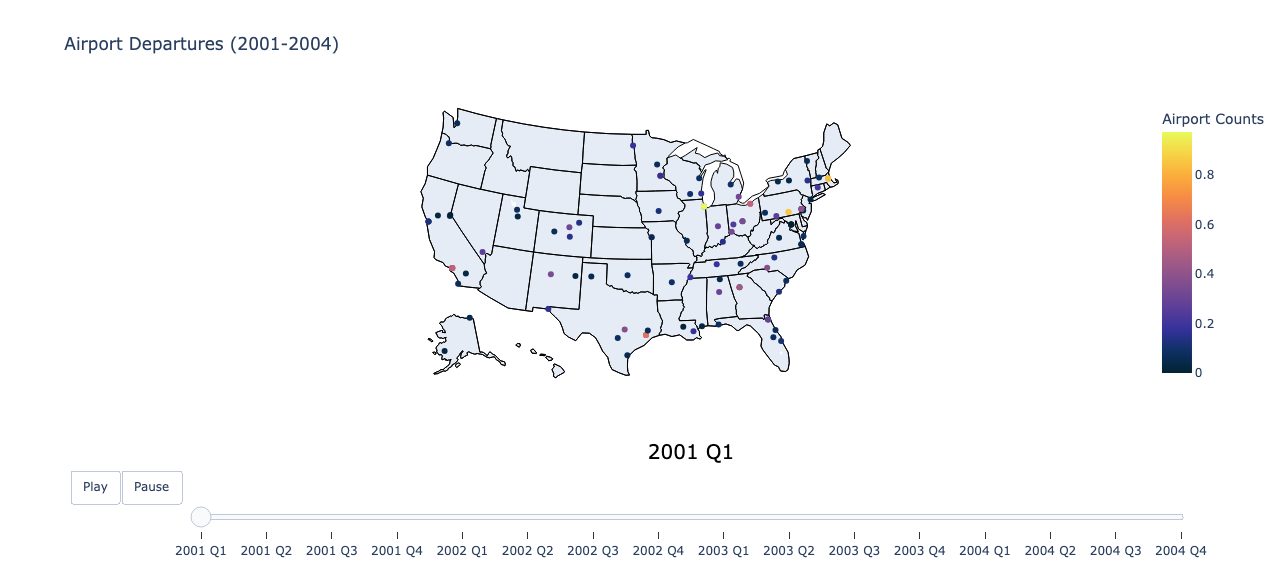

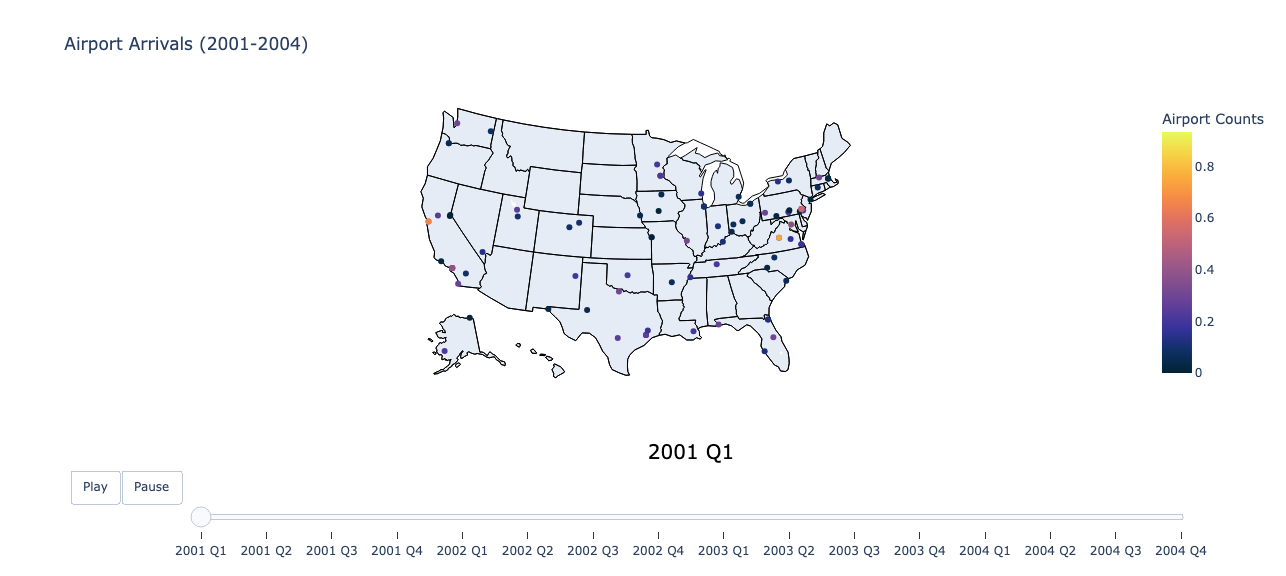

In [336]:
# Plotting the two maps
fig1.show()
fig2.show()

# SAVING THE FILES

### Does not work

In [149]:
# # Create directories to save the frames
# os.makedirs("frames_departures", exist_ok=True)
# os.makedirs("frames_arrivals", exist_ok=True)

# # Save frames for the first figure (Airport Departures)
# for i, frame in enumerate(fig1.frames):
#     fig1.update(frames=[frame])
#     fig1.write_image(f"frames_departures/frame_{i:03d}.png")

# # Save frames for the second figure (Airport Arrivals)
# for i, frame in enumerate(fig2.frames):
#     fig2.update(frames=[frame])
#     fig2.write_image(f"frames_arrivals/frame_{i:03d}.png")

In [152]:
# # Convert frames of Airport Departures to GIF
# with imageio.get_writer(f'airport_departures_{year1}.gif', mode='I', duration=1.0) as writer:
#     for i in range(len(fig1.frames)):
#         filename = f"frames_departures/frame_{i:03d}.png"
#         image = imageio.imread(filename)
#         writer.append_data(image)

# # Convert frames of Airport Arrivals to GIF
# with imageio.get_writer(f'airport_arrivals_{year2}.gif', mode='I', duration=1.0) as writer:
#     for i in range(len(fig2.frames)):
#         filename = f"frames_arrivals/frame_{i:03d}.png"
#         image = imageio.imread(filename)
#         writer.append_data(image)

# BACKGROUND CODE

In [62]:
import re
def extract_state(row):
    pattern = r',\s([A-Z]{2})'
    match = re.search(pattern,row)
    return match.group(1) if match else ""


airfare['state1'] = airfare['city1'].apply(extract_state)
airfare['state2'] = airfare['city2'].apply(extract_state)

In [63]:
airfare['state2'].isna().sum()

0